<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Packages" data-toc-modified-id="Load-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Packages</a></span></li><li><span><a href="#Introduction-to-Time-Series" data-toc-modified-id="Introduction-to-Time-Series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to Time Series</a></span></li><li><span><a href="#Components-of-Time-Series-and-Time-Series-Properties" data-toc-modified-id="Components-of-Time-Series-and-Time-Series-Properties-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Components of Time Series and Time Series Properties</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Decomposition" data-toc-modified-id="Time-Series-Decomposition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Time Series Decomposition</a></span></li><li><span><a href="#Time-Series-Properties" data-toc-modified-id="Time-Series-Properties-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Time Series Properties</a></span><ul class="toc-item"><li><span><a href="#Seasonality-x-Cyclicality" data-toc-modified-id="Seasonality-x-Cyclicality-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Seasonality x Cyclicality</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Additive-x-Multiplicative-Model" data-toc-modified-id="Additive-x-Multiplicative-Model-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Additive x Multiplicative Model</a></span></li></ul></li></ul></li><li><span><a href="#Examples-of-Time-Series" data-toc-modified-id="Examples-of-Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examples of Time Series</a></span><ul class="toc-item"><li><span><a href="#Google-Trends-Data" data-toc-modified-id="Google-Trends-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Google Trends Data</a></span></li></ul></li><li><span><a href="#Stationarity-Tests" data-toc-modified-id="Stationarity-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationarity Tests</a></span><ul class="toc-item"><li><span><a href="#ADF-test" data-toc-modified-id="ADF-test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ADF test</a></span></li><li><span><a href="#KPSS-test" data-toc-modified-id="KPSS-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>KPSS test</a></span></li></ul></li><li><span><a href="#Making-Time-Series-Stationary" data-toc-modified-id="Making-Time-Series-Stationary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Making Time Series Stationary</a></span></li><li><span><a href="#Global-Temperature-Dataset" data-toc-modified-id="Global-Temperature-Dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Global Temperature Dataset</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# to ignore convergence warnings 
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ConvergenceWarning, InterpolationWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', InterpolationWarning)


In this tutorial we provide some basics on time series so you can go further exploring different types of time series problems. We also introduce some algorithms used for forecasting in a way that you can continue exploring those algorithms as well as learning other forecasting algorithms.

This tutorial is divided in 3 notebooks:

* [01-Intro_time_series_tutorial_v220423.ipynb](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/01-Intro_time_series_tutorial_v220423.ipynb)
* [02-Forecasting_with_SARIMAX_v220423.ipynb](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/02-Forecasting_with_SARIMAX_v220423.ipynb)
* [03-Forecasting_with_Facebook_Prophet_v220423.ipynb](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/03-Forecasting_with_Facebook_Prophet_v220423.ipynb)

After completing this tutorial, you will know: 

* How to decompose time series 
* How to identify time series properties
* How to use (S)ARIMA(X) models for forecasting
* How to use Facebook Prophet for forecasting

In particular, after completing the first part of the tutorial presented in this notebook, you will know:

* How to decompose time series 
* How to identify time series properties
* The importance of stationarity
* How to make a time series stationary

# Introduction to Time Series 

`Time series analysis` deals with data that is ordered in time. `Time series data` is one of the most common data types and it is used in a wide variety of domains: finance, climate, health, energy, governance, industry, agriculture, business etc. Being able to effectively work with such data is an increasingly important skill for data scientists, especially when the goal is to report trends, forecast, and even detect anomalies. 

The current explosion of Internet of Things (IoT)  - that collects data using sensors and other sources -  allows industries to use anomaly detection to predict when a machine will malfunction. This permits taking action in advance and avoid stopping production. However, this is an example of anomaly detection, which won't be the main focus of this tutorial. Our main focus is to introduce time series and include some time series forecasting methods.

Some examples where time series are used as forecasting methods include:

* **Public Administration:** By forecasting the consumption of water and energy for the next years, governments are able to plan and build the infrastructure necessary avoiding collapse in the distribution of these resources.
* **Health:** Hospitals can use historical data to know the number of intensive care units necessary in the future, or even plan the number of nurses per shift in order to reduce the waiting time on emergency rooms.
* **Different type of businesses:** Analysing business trends, forecasting company revenue or exploring customer behaviour. 

All in all, no matter which application, there is a great interest in the use of historical data to forecast demand so we can provide consumers what they need without wasting resources. If we think about agriculture, for example, we want to be able to produce what people need without harming the environment. As a result, we are not only having a positive impact on the life producers and consumers but also on the life of the whole society.

These few examples already give a good idea of why time series are important and why a data scientist should have knowledge about it.

# Components of Time Series and Time Series Properties
## Time Series Decomposition
In general, most time series can be decomposed in three major components: `trend`, `seasonality`, and `noise`. 

**`trend`** shows whether the series is consistently decreasing (downward trend), constant (no trend) or increasing (upward trend) over time.

**`seasonality`** describes the periodic signal in your time series. 

**`noise`** or **`residual`** displays the unexplained variance and volatility of the time series.

We can easily access those components applying Python’s statsmodels library [seasonal_decompose]( https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).

## Time Series Properties
Time series components help us recognizing some of important properties such as `seasonality`, ` cyclicality `, `stationarity`, and whether the time series is `additive` or `multiplicative`.  Throughout this tutorial, you will learn how recognizing and understanding such properties is essential in the process of building a successful forecasting model.

### Seasonality x Cyclicality

By observing the seasonal component, we can say if the time series is `seasonal` or `cyclic`. `Seasonality` should always present a fixed and known period. If there is no fixed or known period, we are observing a cyclic signal, i.e., ` cyclicality`.

### Stationarity

A time series is `stationary` if its statistical properties do not change over time.

Many algorithms such as SARIMAX models are built on this concept. For those algorithms it is important to identify this property. This happens because when running linear regression, the assumption is that all of the observations are independent of each other. In a time series, however, we know that observations are time dependent. So, by making the time series stationary we are able to apply regression techniques to time dependent variables. In other words, the data becomes easier to analyse over long periods of time as it won’t necessarily keep varying and so, the algorithms can assume that stationary data and make better predictions.

If the time series is non-stationary there are ways to make it stationary.

A stationary time series fulfills the following criteria:

1.	**Trend zero**.
2.	**The variance in the seasonality component is constant**: The amplitude of the signal does not change much over time.
3.	**Autocorrelation is constant**: The relationship of each value of the time series and its neighbors stays the same.

In addition, to analyzing the components a common way to check for stationarity is to apply statistical tests such as the `Augmented Dicky-Fuller test (ADF)` and the `Kwiatkowski-Phillips-Schmidt-Shin test (KPSS)`. [Both tests](https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html) are part of the Python statsmodel library. In Example's section we give more details about these tests and how to apply them.

### Additive x Multiplicative Model

As seen previously a time series is a combination of its components: trend, seasonal, and residual components. This combination can occur either in an additive or multiplicative way.

**Additive Model**

In an additive model these components are added in linear way where changes over time are consistently made by the same amount.

$$Y(t) = trend + seasonality + residual$$

In the decomposition we can identify it by:

* Linear trend: trend is a straight line
* Linear seasonality: Seasonality with same frequency (width of cycles) and amplitude (height of cycles).

**Multiplicative Model**

On the other side, in a multiplicative model, components are multiplied together:

$$Y(t) = trend * seasonality * residual$$

Therefore, this model is nonlinear (e.g., quadratic or exponential) and changes increase or decrease over time.

* Non-linear trend: trend is a curved line	
* Non-linear seasonality: Seasonality varies in frequency (width of cycles) and/or amplitude (height of cycles).

[One of the main objectives for a decomposition is to estimate **seasonal effects** that can be used to create and present seasonally adjusted values](https://online.stat.psu.edu/stat510/lesson/5/5.1). So to choose between additive and multiplicative decompositions we consider that:

* The additive model is useful when the seasonal variation is relatively constant over time.
* The multiplicative model is useful when the seasonal variation increases over time.

Now time to put all this together and analyze some time series.


# Examples of Time Series

## Google Trends Data

Consider the search for the word "Diet" from the week starting at `2016-03-27` till week starting at `2021-03-21`.

In [2]:
diet_US_2021 = pd.read_csv("../data/google_trends/diet_USA_2021_5_years.csv",
                           skiprows=[0,1], 
                           index_col='Week', 
                           parse_dates=['Week'])
diet_US_2021.head()

,diet: (United States)
Week,
2016-03-27,58
2016-04-03,63
2016-04-10,59
2016-04-17,59
2016-04-24,58


In [3]:
diet_US_2021.tail()

,diet: (United States)
Week,
2021-02-21,52
2021-02-28,49
2021-03-07,48
2021-03-14,44
2021-03-21,48


In [4]:
diet_US_2023 = pd.read_csv("../data/google_trends/diet_USA_2023_5_years.csv",skiprows=[0,1], index_col='Week', parse_dates=['Week'])
diet_US_2023.head()

,diet: (United States)
Week,
2018-04-22,76
2018-04-29,77
2018-05-06,78
2018-05-13,76
2018-05-20,70


In [5]:
diet_US_2023.tail()

,diet: (United States)
Week,
2023-03-12,48
2023-03-19,45
2023-03-26,48
2023-04-02,43
2023-04-09,43


In [6]:
diet_USA = pd.concat([diet_US_2021.reset_index(), diet_US_2023.reset_index()])

In [7]:
diet_USA.head()

,Week,diet: (United States)
0,2016-03-27,58
1,2016-04-03,63
2,2016-04-10,59
3,2016-04-17,59
4,2016-04-24,58


In [8]:
diet_USA.tail()

,Week,diet: (United States)
255,2023-03-12,48
256,2023-03-19,45
257,2023-03-26,48
258,2023-04-02,43
259,2023-04-09,43


In [9]:
diet_USA.drop_duplicates(subset='Week', inplace=True)

In [10]:
diet_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 259
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Week                   368 non-null    datetime64[ns]
 1   diet: (United States)  368 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [11]:
diet_USA.to_csv("../data/processed/diet_USA_2016_2023.csv", index=False)

In [12]:
diet_USA.describe()

,diet: (United States)
count,368.000000
mean,52.233696
std,11.891872
min,28.000000
25%,44.000000
50%,50.000000
75%,60.000000
max,100.000000


In [13]:
diet_USA = pd.read_csv('../data/processed/diet_USA_2016_2023.csv',
                   index_col=[0],
                  parse_dates=[0])

In [14]:
diet_USA.head()

,diet: (United States)
Week,
2016-03-27,58
2016-04-03,63
2016-04-10,59
2016-04-17,59
2016-04-24,58


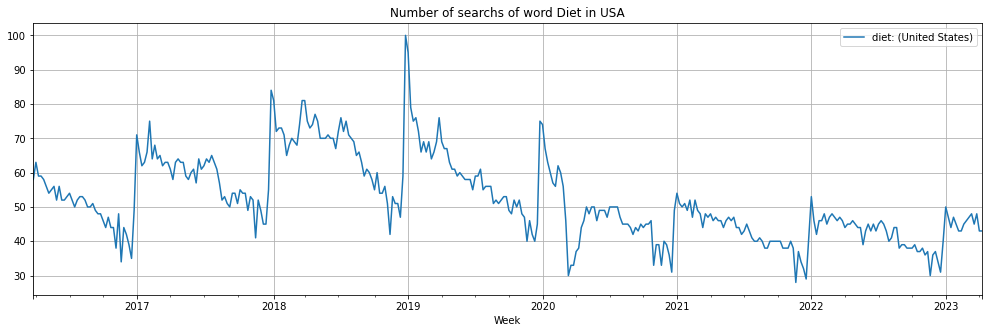

In [15]:
# Plot the entire time series diet and show gridlines
diet_USA.plot(grid=True,figsize=(17,5), title = "Number of searchs of word Diet in USA" )
plt.show()

The plot above shows a clear pattern: At the end of the year the word `Diet` has the lowest number of search while at the beginning of the year it has the highest number of searches. Do people at the end of the year just want to celebrate and enjoy good food? In consequence, do they choose as New Year’s resolution to become in good shape?

This time series has a `seasonal pattern`, i.e., it is influenced by seasonal factors. Seasonality occurs over a fixed and known period (e.g., the quarter of the year, the month, or day of the week). In this case the end of year festivities.

We can also observe that there is no constant increase or decrease in trend which would suggest a `non-linear trend`.

Let's decompose this time series in its components. We remove the effects of the trend from the original signal by either
subtracting its effects or dividing out its effects for `additive` or `multiplicative` types of decompositions, respectively.

Because we believe that trend is non-linear, we will set parameter `model` as multiplicative. By default, this parameter is additive.

Parameter `period` is optional but you can set it depending on the time series. Because the data is given in weeks, we set in period the number of weeks in a year.


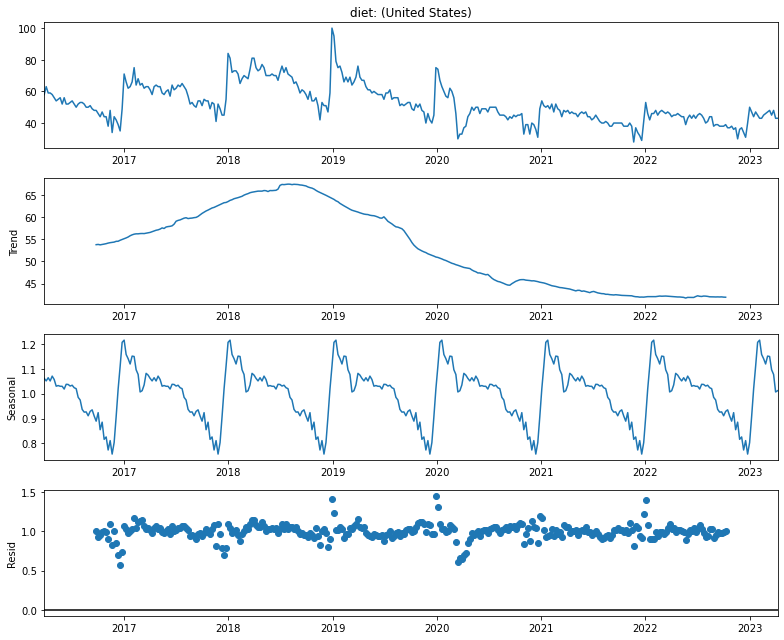

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(diet_USA['diet: (United States)'],
                                         model = 'multiplicative',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

Observe that both frequency and amplitude of seasonal component do not change with time suggesting linear seasonality, i.e., a seasonal additive model. Let's change parameter model to additive.

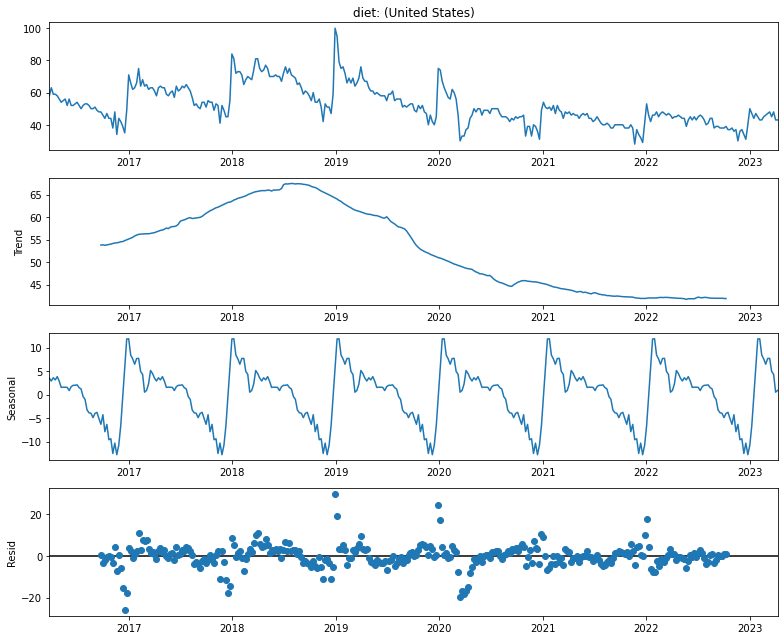

In [17]:
decomposition = sm.tsa.seasonal_decompose(diet_USA['diet: (United States)'],
                                         model = 'additive',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

As we suspected trend is non-linear. More than this, the time series follows no consistent upwards or downwards slope. Therefore, there is no positive (upwards slope) or negative (downwards slope) trend.

What is the trend in the Netherlands for the word `diet`?

In [18]:
diet_NL = pd.read_csv("../data/google_trends/diet_NL_5_years.csv",skiprows=[0,1], index_col='Week', parse_dates=['Week'])
diet_NL.head()

,diet: (Netherlands)
Week,
2018-04-22,48
2018-04-29,42
2018-05-06,50
2018-05-13,59
2018-05-20,52


In [19]:
diet_NL.tail()

,diet: (Netherlands)
Week,
2023-03-12,45
2023-03-19,41
2023-03-26,45
2023-04-02,45
2023-04-09,48


In [20]:
diet_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2018-04-22 to 2023-04-09
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   diet: (Netherlands)  260 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [21]:
diet_NL.describe()

,diet: (Netherlands)
count,260.000000
mean,41.846154
std,8.427718
min,20.000000
25%,36.750000
50%,41.000000
75%,47.000000
max,100.000000


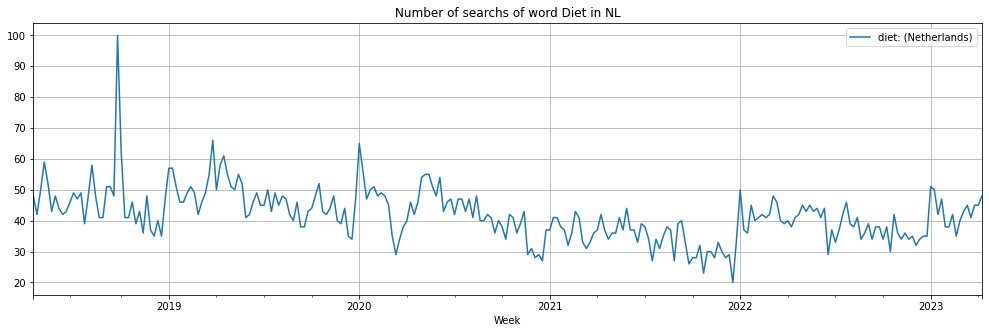

In [22]:
# Plot the entire time series diet and show gridlines
diet_NL.plot(grid=True,figsize=(17,5), title = "Number of searchs of word Diet in NL" )
plt.show()

As from the search of the word diet by the Americans, there is a increase in the search of the word `diet` at the beginning of the year. Although, only years 2020 and 2022 has the highest number of search at the beginning of the year. It suggests `seasonality`. Let's see what seasonality component says.

We can also observe that there is no constant increase or decrease in trend which would suggest a `non-linear trend`.

Let's decompose this time series in its components. Because we believe that trend is non-linear, we will set parameter `model` as multiplicative. By default, this parameter is additive.

Parameter `period` is optional but you can set it depending on the time series. Because the data is given in weeks, we set in period the number of weeks in a year.


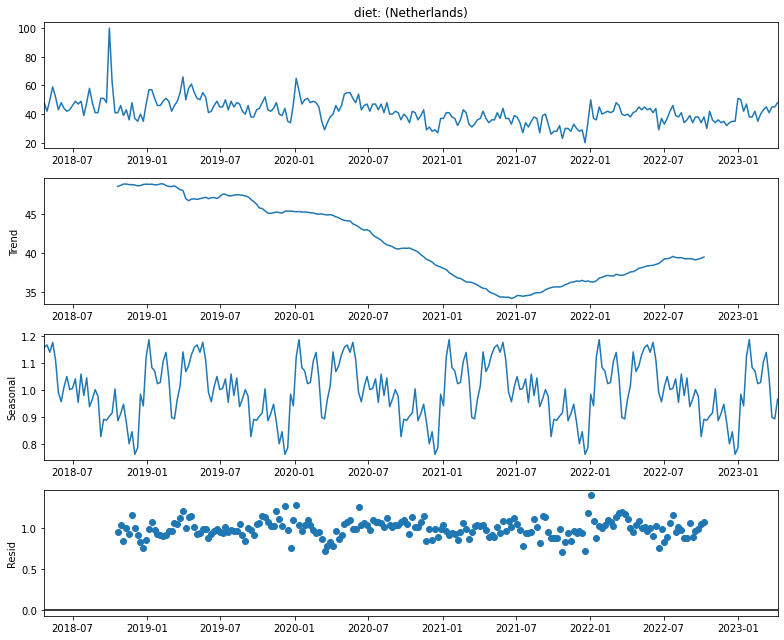

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(diet_NL['diet: (Netherlands)'],
                                         model = 'multiplicative',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

Once more, observe that both frequency and amplitude of seasonal component do not change with time suggesting linear seasonality, i.e., a seasonal additive model. Let's change parameter model to additive.

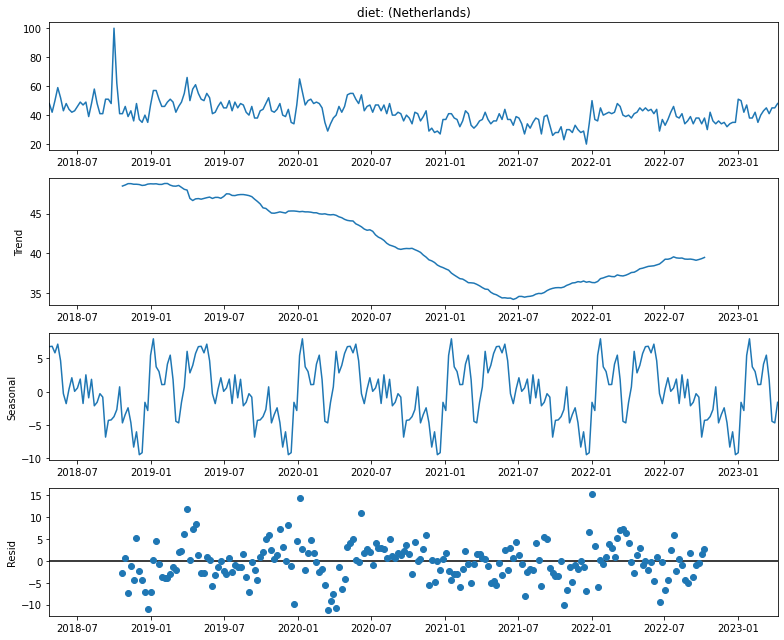

In [24]:
decomposition = sm.tsa.seasonal_decompose(diet_NL['diet: (Netherlands)'],
                                         model = 'additive',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

The trend starts going downwards and then go upwords so trend is non-linear.

Want to know more? Check this [interesting article](https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930) about performing additive and multiplicative decomposition.

# Stationarity Tests

`Augmented Dicky-Fuller test (ADF)` is a very popular test for stationarity. However, it can happen that a time series passes the ADF test, without being stationary. `Kwiatkowski-Phillips-Schmidt-Shin (KPSS)` is another test for checking the stationarity of a time series. It is prudent to apply both tests, so that it can be ensured that the series is truly stationary. Next to that, we cannot forget although the importance of also observing the time series plot.

## ADF test

ADF test is used to determine the presence of unit root in the series, and hence helps in understanding if the series is stationary or not. The null and alternate hypothesis of this test are:

`Null Hypothesis`: The series has a unit root, meaning it is non-stationary. It has some time dependent structure.

`Alternate Hypothesis`: The series has no unit root, meaning it is stationary. It does not have time-dependent structure.

If the null hypothesis failed to be rejected, this test may provide evidence that the series is non-stationary.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

## KPSS test

The null and alternate hypothesis for the KPSS test is opposite that of the ADF test.

`Null Hypothesis`: The process is trend stationary.

`Alternate Hypothesis`: The series has a unit root (series is not stationary).

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (non-stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (stationary).

The functions bellow can be found [here](https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html).


In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

When applying those tests the following outcomes are possible:

**Case 1:** Both tests conclude that the series is not stationary - _The series is not stationary_

**Case 2:** Both tests conclude that the series is stationary - _The series is stationary_

**Case 3:** KPSS indicates stationarity and ADF indicates non-stationarity - _The series is trend stationary_. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

**Case 4:** KPSS indicates non-stationarity and ADF indicates stationarity - _The series is difference stationary_. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

Let's apply the tests on the Google Trends data.

In [27]:
adf_test(diet_USA['diet: (United States)'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.750802
p-value                          0.065652
#Lags Used                       6.000000
Number of Observations Used    361.000000
Critical Value (1%)             -3.448595
Critical Value (5%)             -2.869580
Critical Value (10%)            -2.571053
dtype: float64


In [28]:
kpss_test(diet_USA['diet: (United States)'])

Results of KPSS Test:
Test Statistic            1.646541
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Based upon the significance level of 0.05 and the p-value:

**ADF test**: The null hypothesis is not rejected. Hence, the series is **non stationary**

**KPSS test**: There is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is **non-stationary** as per the KPSS test.

These results fall in case 1. In this case, we should apply difference to make the time series stationary and apply again the tests until the results of both tests point to stationarity. 

Summing up, the analysis made so far shows that:

1. Trend is non-linear (`multiplicative`) and is not increasing or decreasing all the time.
2. We have `seasonality` influenced apparently by end-of-the-year festive period.
3. Seasonality is linear, i.e., seasonality does not vary in frequency (width of cycles) neither amplitude (height of cycles).
4. Additive residuals are smaller than multiplicative residuals.
5. Time series is non stationary according to both ADF and KPSS test.

Because of the linear seasonality and small additive residuals we can conclude that an additive model is more appropriate in this case.


# Making Time Series Stationary

Many statistical models require the time series to be stationary to make effective and precise predictions. This is the case of ARIMA models which we will see in [02-Forecasting_with_SARIMAX_v220423.ipynb](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/notebooks/02-Forecasting_with_SARIMAX_v220423.ipynb).

A very common way to make a time series stationary is differencing: from each value in our time series, we subtract the previous value. 

Other transformations can also be applied. We could, for instances, take the log, or the square root of a time series.

In [29]:
def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Returns:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times 
        differencing on a time-series.
    
    """
    
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True
            
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df


In [30]:
obtain_adf_kpss_results(diet_USA, 3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,6.565231e-02,0.01,False,False,False
1,1,4.831303e-18,0.10,True,True,True
2,2,1.404051e-16,0.10,True,True,True


Differencing once is enough to make our time series stationary. Observe the plots bellow showing the original time series and the time series after differencing once.

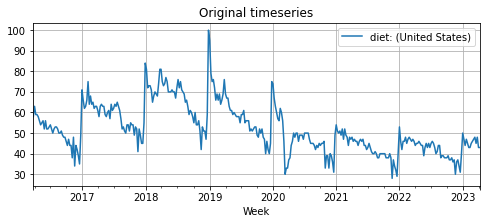

In [31]:
diet_USA.plot(grid=True,figsize=(8,3), title = "Original timeseries" )
plt.show()

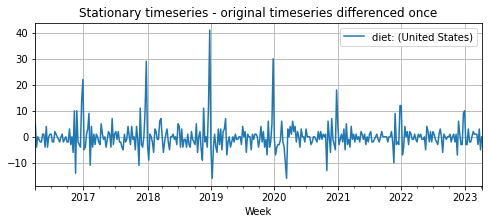

In [32]:
diet_USA.diff().dropna().plot(grid=True,figsize=(8,3), title = "Stationary timeseries - original timeseries differenced once" )
plt.show()

You can't see any trend, or any obvious changes in variance, or dynamics. This time series now looks stationary.

# Global Temperature Dataset

Let's consider another example: [global temperature dataset time series](https://datahub.io/core/global-temp#data). This dataset includes global monthly mean temperature anomalies in degrees Celsius from 1880 to the present. Data are included from the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG).

In [33]:
weather = pd.read_csv("../data/raw/time-series/monthly_csv.csv",index_col='Date', parse_dates=['Date'])
weather.sort_index(inplace=True)
weather.head()

,Source,Mean
Date,,
1880-01-06,GISTEMP,-0.3000
1880-01-06,GCAG,0.0009
1880-02-06,GCAG,-0.1229
1880-02-06,GISTEMP,-0.2100
1880-03-06,GCAG,-0.1357


In [34]:
gistemp = weather[weather['Source']=='GISTEMP']
gistemp.drop(columns='Source',inplace=True)
gistemp.columns = ['Mean Temp Anomalie - GISS']
gcag = weather[weather['Source']=='GCAG']
gcag.drop(columns='Source', inplace=True)
gcag.columns = ['Mean Temp Anomalie - GCAG']

gistemp.head()

,Mean Temp Anomalie - GISS
Date,
1880-01-06,-0.30
1880-02-06,-0.21
1880-03-06,-0.18
1880-04-06,-0.27
1880-05-06,-0.14


In [35]:
gistemp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 1880-01-06 to 2016-12-06
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mean Temp Anomalie - GISS  1644 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


In [36]:
gcag.head()

,Mean Temp Anomalie - GCAG
Date,
1880-01-06,0.0009
1880-02-06,-0.1229
1880-03-06,-0.1357
1880-04-06,-0.0499
1880-05-06,-0.0738


In [37]:
gcag.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 1880-01-06 to 2016-12-06
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mean Temp Anomalie - GCAG  1644 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


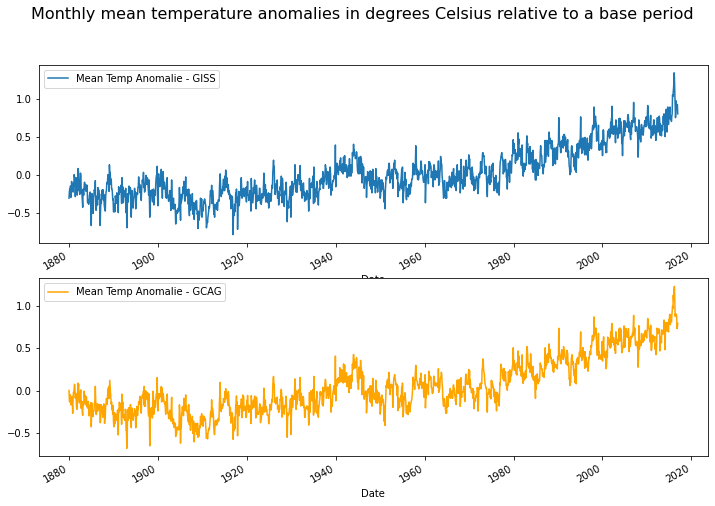

In [38]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,8))
plt.suptitle("Monthly mean temperature anomalies in degrees Celsius relative to a base period", size = 16)

# Plot ACF and PACF
gistemp.plot(ax=ax1)
gcag.plot(ax=ax2, color='orange')

# Show plot
plt.show()

These initial plots of both time series suggests that there is a positive trend, and therefore these time series would not be stationary.

Let's decompose the time series

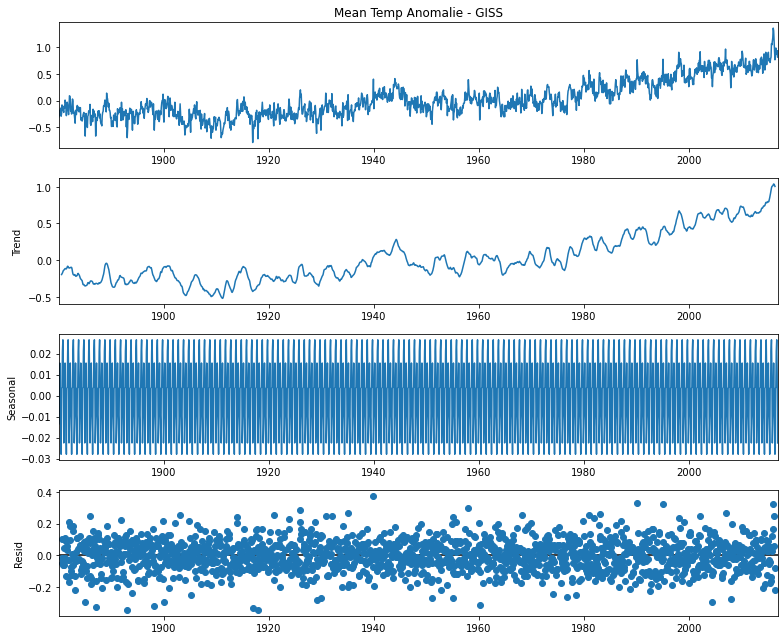

In [39]:
decomposition_gistemp = sm.tsa.seasonal_decompose(gistemp['Mean Temp Anomalie - GISS']
                                                  , freq=12) # monthly
fig = decomposition_gistemp.plot()
plt.show()

It is a bit hard to observe seasonality with this low frequency. Let's increase it.

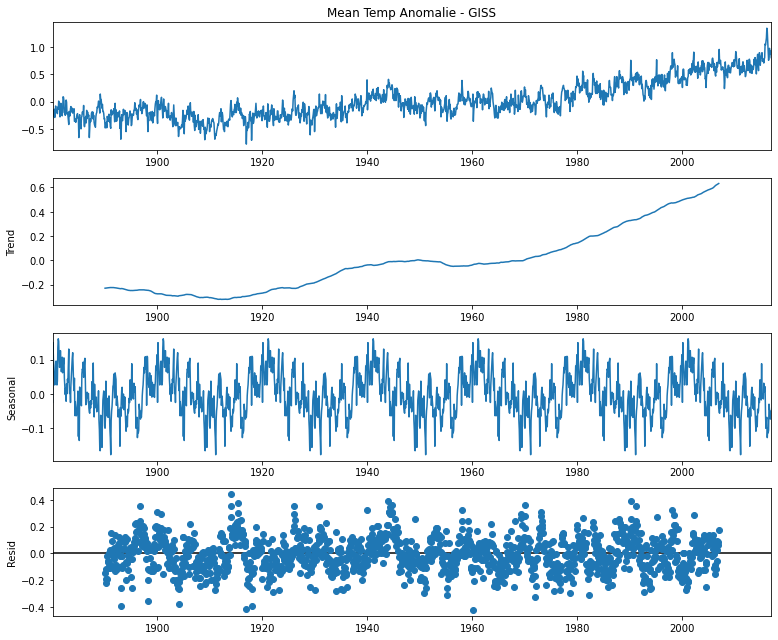

In [40]:
decomposition_gistemp = sm.tsa.seasonal_decompose(gistemp['Mean Temp Anomalie - GISS'],
                                                  freq=240) #20 years 
fig = decomposition_gistemp.plot()
plt.show()

Definitively, trend is positive, suggesting non-stationarity. The amplitude and frequency of seasonality does not change which suggests an additive model.

In [41]:
adf_test(gistemp)

Results of Dickey-Fuller Test:
Test Statistic                   -0.360964
p-value                           0.916415
#Lags Used                       24.000000
Number of Observations Used    1619.000000
Critical Value (1%)              -3.434396
Critical Value (5%)              -2.863327
Critical Value (10%)             -2.567721
dtype: float64


In [42]:
kpss_test(gistemp)

Results of KPSS Test:
Test Statistic            4.970866
p-value                   0.010000
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Both tests agree that the Gistemp time series is not stationary, confirming what we just observed.

Let's zoom in a more recent period of time.

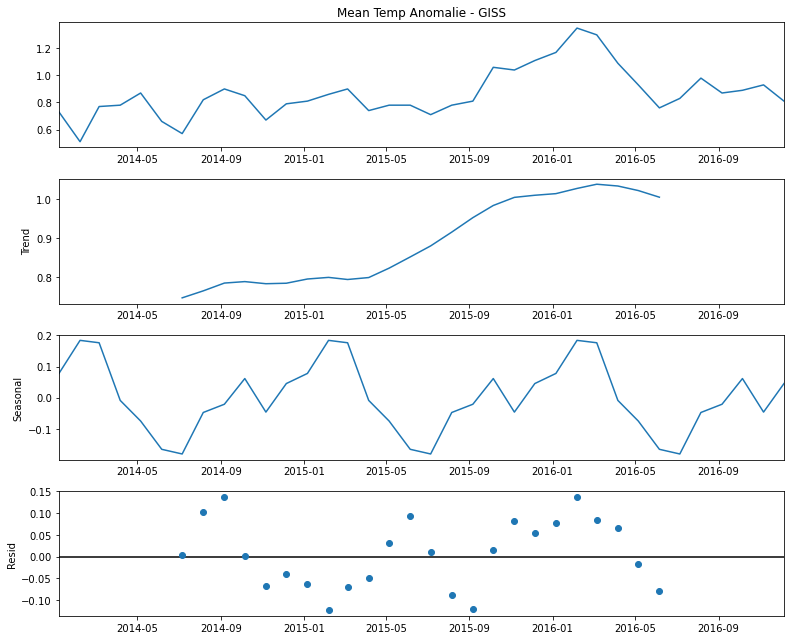

In [43]:
decomposition = sm.tsa.seasonal_decompose(gistemp['Mean Temp Anomalie - GISS']["2014":"2016"],freq=12)
fig = decomposition.plot()
plt.show()

In the last 2 years of GISTEMP - Global Land-Ocean Temperature Index data, we can observe a positive trend as well as seasonality. Lower values around July and higher values around March.

Let's check how many times we should difference to make it stationary

In [44]:
obtain_adf_kpss_results(gistemp, 3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,9.164152e-01,0.01,False,False,False
1,1,9.464601e-23,0.10,True,True,True
2,2,2.255372e-29,0.10,True,True,True


In [45]:
obtain_adf_kpss_results(gcag, 3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,8.921048e-01,0.01,False,False,False
1,1,7.940293e-22,0.10,True,True,True
2,2,4.754621e-29,0.10,True,True,True


Both `gistemp` and `gcag` time series become stationary after differencing once (d=1).

The following plot shows the original timeseries.

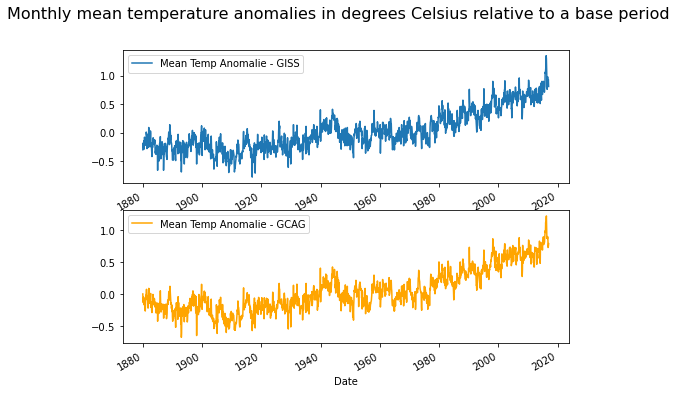

In [46]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,6))
plt.suptitle("Monthly mean temperature anomalies in degrees Celsius relative to a base period", size = 16)

# Plot ACF and PACF
gistemp.plot(ax=ax1)
gcag.plot(ax=ax2, color='orange')

# Show plot
plt.show()

Bellow time series after differencing.

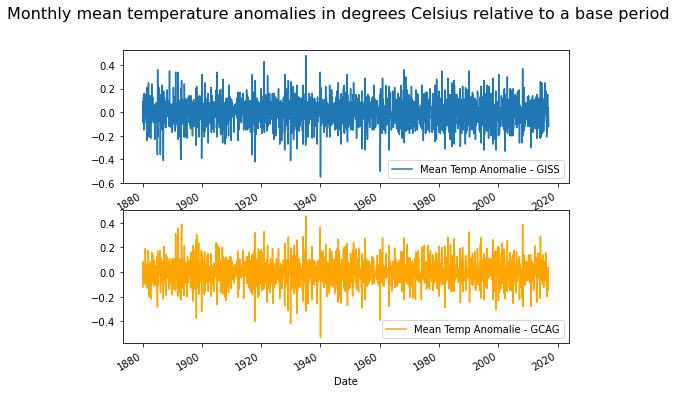

In [47]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,6))
plt.suptitle("Monthly mean temperature anomalies in degrees Celsius relative to a base period", size = 16)

# Plot ACF and PACF
gistemp.diff().dropna().plot(ax=ax1)
gcag.diff().dropna().plot(ax=ax2, color='orange')

# Show plot
plt.show()

# Conclusions

In this notebook you were introduced to time series. You've learnt about important time series properties and how to identify them using both statistical and graphical tools.

In the next notebooks we will use what was learnt so far and be introduced to some forecasting algorithms:

- [SARIMAX models](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/notebooks/02-Forecasting_with_SARIMAX_v220423.ipynb)

- [Facebook Prophet](https://github.com/MKB-Datalab/workshop_ts_forecasting/notebooks/notebooks/03-Forecasting_with_Facebook_Prophet_v220423.ipynb)